In [24]:
import pandas as pd
import time
from os.path import join
import json 
import numpy as np 
from tqdm import tqdm
import seaborn as sns
from os import listdir, path
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
# make a train test split 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
telemetria_fallas_30_antes = pd.read_parquet('../data/processed/telemetria_fallas_30_antes.parquet')  
telemetria_sin_fallas_30 = pd.read_parquet('../data/processed/telemetria_sin_fallas_30.parquet')
telemetria_sin_fallas_30['Id'] = telemetria_sin_fallas_30['Id'] + 1000 

In [8]:
df_dataset_telemetria = pd.concat([telemetria_fallas_30_antes, telemetria_sin_fallas_30], axis=0)


In [10]:
datos_telemetria_agg = df_dataset_telemetria.groupby('Id').agg(mean_volt = ('volt', 'mean'),
                                                mean_rot = ('rotate', 'mean'),
                                                mean_press = ('pressure', 'mean'),
                                                mean_vib = ('vibration', 'mean'),
                                                max_volt = ('volt', 'max'),
                                                max_rot = ('rotate', 'max'),
                                                max_press = ('pressure', 'max'),
                                                max_vib = ('vibration', 'max'),
                                                min_volt = ('volt', 'min'),
                                                min_rot = ('rotate', 'min'),
                                                min_press = ('pressure', 'min'),
                                                min_vib = ('vibration', 'min'),
                                                std_volt = ('volt', 'std'),
                                                std_rot = ('rotate', 'std'),
                                                std_press = ('pressure', 'std'),
                                                std_vib = ('vibration', 'std'),
                                                failure_binary = ('failure_binary', 'max'),
                                                failure = ('failure', 'max')
                                                
)


In [75]:
datos_telemetria_agg.head(20)

,mean_volt,mean_rot,mean_press,mean_vib,max_volt,max_rot,max_press,max_vib,min_volt,min_rot,min_press,min_vib,std_volt,std_rot,std_press,std_vib,failure_binary,failure
Id,,,,,,,,,,,,,,,,,,
0,171.613742,444.439583,98.833336,51.901049,215.656488,517.348533,118.853452,62.464103,127.163620,365.213804,82.400818,41.674887,20.474522,34.829504,9.536715,5.253330,1,4
1,186.270657,440.751774,98.217065,39.703847,216.930340,527.416300,115.511427,48.899814,157.315698,354.540120,74.378060,29.981067,17.382095,47.117141,10.491923,5.772734,1,1
2,170.884973,374.567725,101.921812,40.135772,203.104007,489.502527,121.802701,50.877634,136.116842,215.619476,79.552597,30.093808,15.474454,58.837812,9.924503,4.525611,1,2
3,171.404311,460.953214,101.431850,48.283550,198.380679,590.323104,136.553131,57.504011,142.165191,387.342414,86.351078,39.065462,16.009011,48.079568,9.706397,5.285412,1,4
4,166.855652,440.755662,96.903260,57.088316,196.427450,522.264401,121.728619,67.633435,138.740244,345.711420,75.959631,41.313996,15.295089,48.032168,12.038205,7.123330,1,4
5,190.572435,367.341787,99.060034,39.559052,215.972031,497.146639,119.943141,48.063645,163.239141,257.891638,77.487338,30.857904,15.101133,66.739283,11.259396,5.355662,1,1
6,189.999632,366.854180,100.222335,39.816261,215.972031,497.146639,119.943141,48.063645,163.239141,257.891638,77.487338,30.857904,15.240990,67.030207,11.618978,5.570350,1,2
7,170.148489,361.557428,100.285487,49.091851,213.008894,446.729270,120.405373,58.538069,142.680444,293.039842,81.177717,38.575182,15.498430,38.732408,9.529712,5.545470,1,2
8,167.924079,391.644877,101.081699,39.582343,192.784173,452.449482,120.645727,52.776580,147.604634,269.430591,83.367658,33.158406,13.550465,46.020380,10.177398,4.837688,1,2


In [17]:


features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib' ]
target = 'failure'

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[107,   1,   1,   1,   3],
       [  3,  23,   3,   1,   0],
       [  0,   4,  44,   1,   1],
       [  0,   0,   1,  17,   0],
       [  1,   0,   1,   1,  19]])

In [32]:
# Seleccionar características y variable objetivo
X = datos_telemetria_agg[features]
y = datos_telemetria_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión logística y ajustarlo a los datos de entrenamiento
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predecir clase de los datos de prueba
y_pred = model.predict(X_test)

# Evaluar rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Exactitud del modelo: ", accuracy)
print("Matriz de confusión: ")
print(confusion)


Exactitud del modelo:  0.9012875536480687
Matriz de confusión: 
[[107   1   1   1   3]
 [  3  23   3   1   0]
 [  0   4  44   1   1]
 [  0   0   1  17   0]
 [  1   0   1   1  19]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparacion de modelos

In [33]:


# Cargar datos

# Seleccionar características y variable objetivo
X = datos_telemetria_agg[features]
y = datos_telemetria_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelos de regresión logística, SVM y árbol de decisión
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar modelos
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predecir clase de los datos de prueba
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Evaluar rendimiento del modelo
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_confusion = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)

# Imprimir resultados
print("Exactitud del modelo de regresión logística: ", lr_accuracy)
print("Matriz de confusión del modelo de regresión logística: ")
print(lr_confusion)

print("Exactitud del modelo SVM: ", svm_accuracy)
print("Matriz de confusión del modelo SVM: ")
print(svm_confusion)

print("Exactitud del modelo de árbol de decisión: ", dt_accuracy)
print("Matriz de confusión del modelo de árbol de decisión: ")
print(dt_confusion)


Exactitud del modelo de regresión logística:  0.9012875536480687
Matriz de confusión del modelo de regresión logística: 
[[107   1   1   1   3]
 [  3  23   3   1   0]
 [  0   4  44   1   1]
 [  0   0   1  17   0]
 [  1   0   1   1  19]]
Exactitud del modelo SVM:  0.6952789699570815
Matriz de confusión del modelo SVM: 
[[112   0   1   0   0]
 [ 29   0   0   1   0]
 [  0   0  50   0   0]
 [ 17   0   1   0   0]
 [ 19   0   2   1   0]]
Exactitud del modelo de árbol de decisión:  0.8454935622317596
Matriz de confusión del modelo de árbol de decisión: 
[[104   3   1   3   2]
 [  5  20   0   4   1]
 [  0   5  43   2   0]
 [  1   0   0  16   1]
 [  5   0   2   1  14]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del modelo de regresión logística:  0.9012875536480687


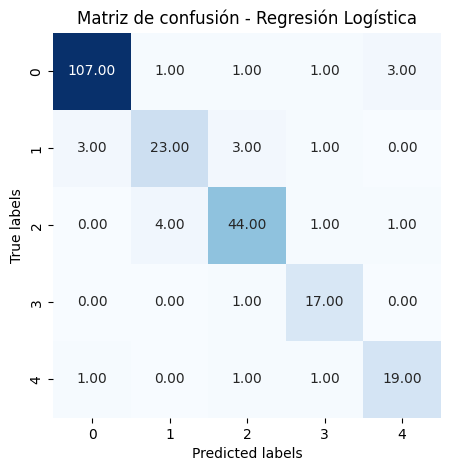

Exactitud del modelo SVM:  0.6952789699570815


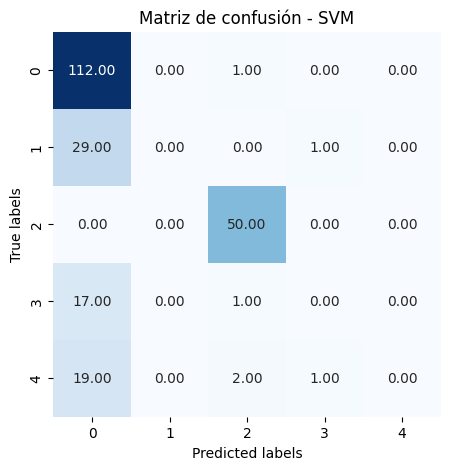

Exactitud del modelo de árbol de decisión:  0.8454935622317596


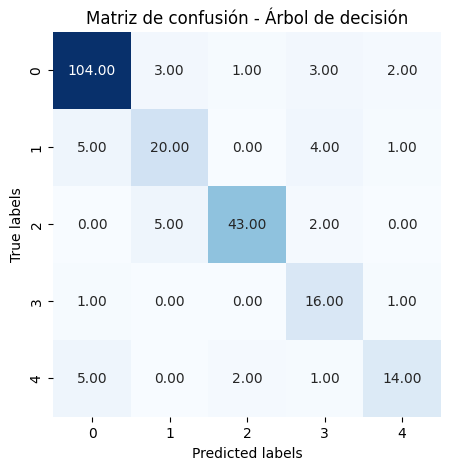

In [36]:

# Imprimir resultados y graficar matriz de confusión para el modelo de regresión logística
print("Exactitud del modelo de regresión logística: ", lr_accuracy)

plt.figure(figsize=(5,5))
sns.heatmap(lr_confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

# Graficar matriz de confusión para el modelo SVM
print("Exactitud del modelo SVM: ", svm_accuracy)

plt.figure(figsize=(5,5))
sns.heatmap(svm_confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Matriz de confusión - SVM")
plt.show()

# Graficar matriz de confusión para el modelo de árbol de decisión
print("Exactitud del modelo de árbol de decisión: ", dt_accuracy)

plt.figure(figsize=(5,5))
sns.heatmap(dt_confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Matriz de confusión - Árbol de decisión")
plt.show()


## StandardScaler 

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
X = datos_telemetria_agg[['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
        'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
        'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']]
y = datos_telemetria_agg['failure']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos de entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Normalizar datos de prueba
X_test = scaler.transform(X_test)

# Crear modelos de regresión logística, SVM y árbol de decisión
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar modelos
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predecir clase de los datos de prueba
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Evaluar rendimiento del modelo
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_confusion = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)

# Imprimir resultados
print("Exactitud del modelo de regresión logística: ", lr_accuracy)
print("Matriz de confusión del modelo de regresión logística: ")
print(lr_confusion)

print("Exactitud del modelo SVM: ", svm_accuracy)
print("Matriz de confusión del modelo SVM: ")
print(svm_confusion)

print("Exactitud del modelo de árbol de decisión: ", dt_accuracy)
print("Matriz de confusión del modelo de árbol de decisión: ")
print(dt_confusion)

Exactitud del modelo de regresión logística:  0.9184549356223176
Matriz de confusión del modelo de regresión logística: 
[[107   1   1   2   2]
 [  0  27   0   2   1]
 [  0   3  43   2   2]
 [  0   0   0  17   1]
 [  0   0   1   1  20]]
Exactitud del modelo SVM:  0.8969957081545065
Matriz de confusión del modelo SVM: 
[[105   2   1   3   2]
 [  0  25   0   4   1]
 [  0   5  44   1   0]
 [  0   0   1  16   1]
 [  0   0   2   1  19]]
Exactitud del modelo de árbol de decisión:  0.8454935622317596
Matriz de confusión del modelo de árbol de decisión: 
[[104   3   1   3   2]
 [  5  20   0   4   1]
 [  0   5  43   2   0]
 [  1   0   0  16   1]
 [  5   0   2   1  14]]


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


def load_data(file_path):
    # Cargar datos desde archivo CSV
    return pd.read_csv(file_path)


def split_data(X, y, test_size=0.2, random_state=42):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def normalize_data(X_train, X_test):
    # Normalizar los datos de entrenamiento y prueba
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    return X_train_norm, X_test_norm


def train_logistic_regression(X_train, y_train):
    # Entrenar modelo de regresión logística
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    return lr_model


def train_svm(X_train, y_train):
    # Entrenar modelo SVM
    svm_model = SVC(kernel='sigmoid',random_state=42)
    svm_model.fit(X_train, y_train)
    return svm_model


def train_decision_tree(X_train, y_train):
    # Entrenar modelo de árbol de decisión
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    return dt_model


def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en los datos de prueba y calcular la exactitud y la matriz de confusión
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion


def plot_confusion_matrix(confusion, model_name):
    # Graficar matriz de confusión para un modelo dado
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matriz de confusión - " + model_name)
    plt.show()


Exactitud del modelo de regresión logística:  0.9141630901287554


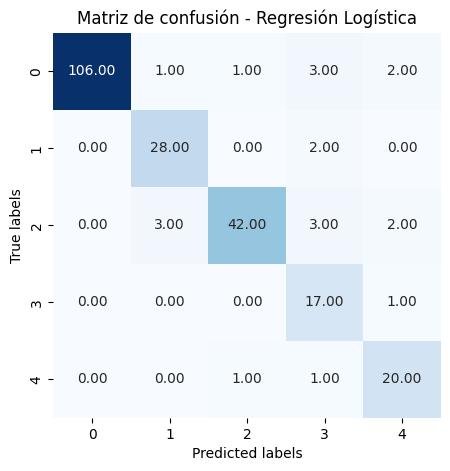

Exactitud del modelo SVM:  0.9098712446351931


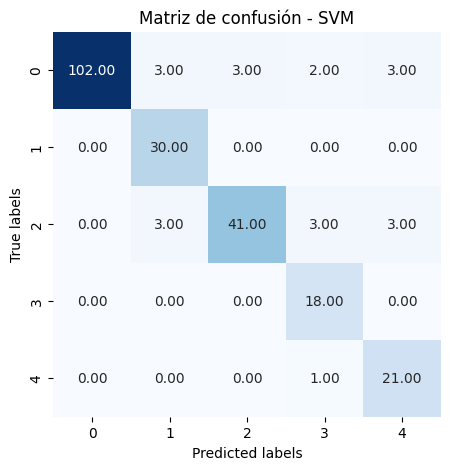

Exactitud del modelo de árbol de decisión:  0.8669527896995708


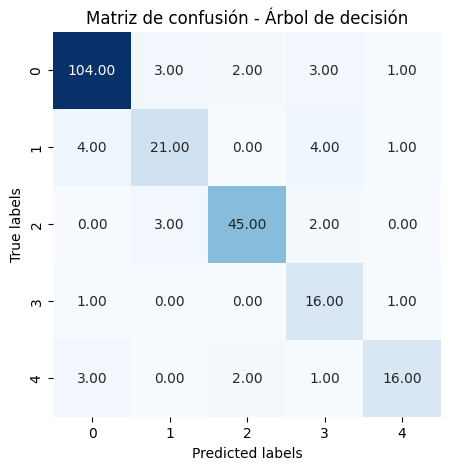

In [73]:
# Cargar datos 
# 'min_volt', 'std_volt', 
# Seleccionar características y variable objetivo
X = datos_telemetria_agg[['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
         'max_press', 'max_vib',  'min_rot', 'min_press',
        'min_vib',  'std_press', 'std_vib']]
y = datos_telemetria_agg['failure']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = split_data(X, y)

# Normalizar datos de entrenamiento y prueba
X_train_norm, X_test_norm = normalize_data(X_train, X_test)

# Entrenar modelos de regresión logística, SVM y árbol de decisión
lr_model = train_logistic_regression(X_train_norm, y_train)
svm_model = train_svm(X_train_norm, y_train)
dt_model = train_decision_tree(X_train_norm, y_train)

# Evaluar rendimiento de los modelos en los datos de prueba
lr_accuracy, lr_confusion = evaluate_model(lr_model, X_test_norm, y_test)
svm_accuracy, svm_confusion = evaluate_model(svm_model, X_test_norm, y_test)
dt_accuracy, dt_confusion = evaluate_model(dt_model, X_test_norm, y_test)

# Imprimir resultados
print("Exactitud del modelo de regresión logística: ", lr_accuracy)
plot_confusion_matrix(lr_confusion, "Regresión Logística")

print("Exactitud del modelo SVM: ", svm_accuracy)
plot_confusion_matrix(svm_confusion, "SVM")

print("Exactitud del modelo de árbol de decisión: ", dt_accuracy)
plot_confusion_matrix(dt_confusion, "Árbol de decisión")


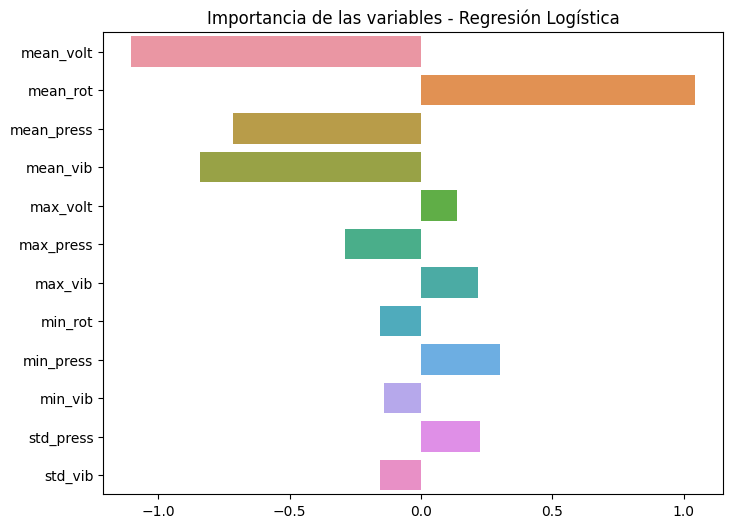

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x=lr_model.coef_[0], y=X.columns)
plt.title("Importancia de las variables - Regresión Logística")
plt.show()

# TODO 

* Utilizar kfold cross validation 
* Modelos mas complejos 
* Explicabilidad del modelo 

